<a href="https://colab.research.google.com/github/rianzulhaq/PCVK_Genap_2021/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import glob


Gamma correction pada citra
---------------------------------
Masukkan nilai Gamma: 3


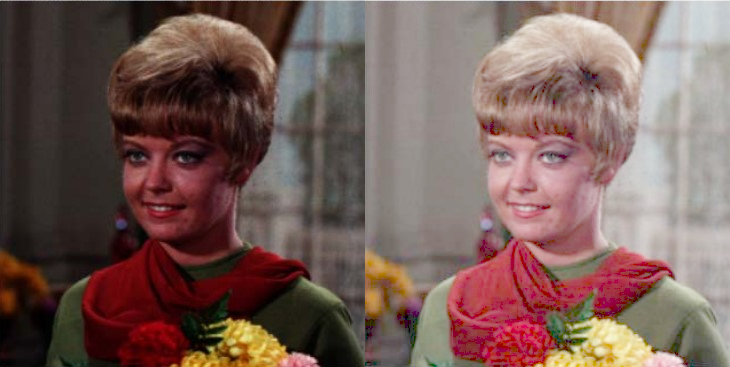

In [4]:
# Tugas 1
print('Gamma correction pada citra')
print('---------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/gambar/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Image Depth pada citra 
-------------------------
Masukkan Nilai Bit Depth : 7


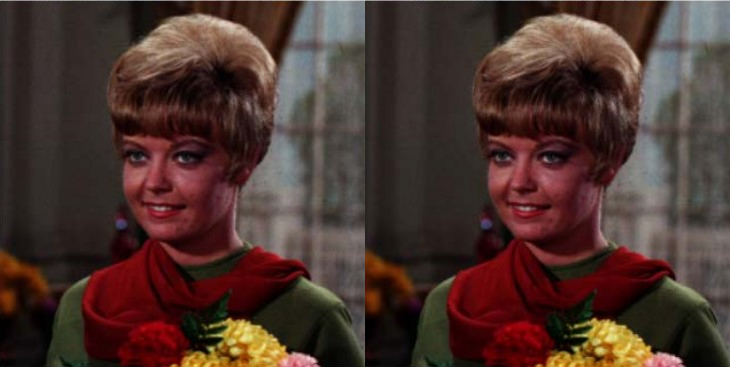

In [19]:
# Tugas 2
img = cv.imread('/content/drive/MyDrive/PCVK/gambar/female.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
original = cv.cvtColor(image, cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Image Depth pada citra ')
print('-------------------------')
try:
  bd = float(input('Masukkan Nilai Bit Depth : '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255/(bit-1)
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for z in range(original.shape[2]):
      gamma_image[y,x,z] = np.clip(round(original[y,x,z]/level)*level, 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

Nilai PSNR adalah 28.75450169435217 (dB)


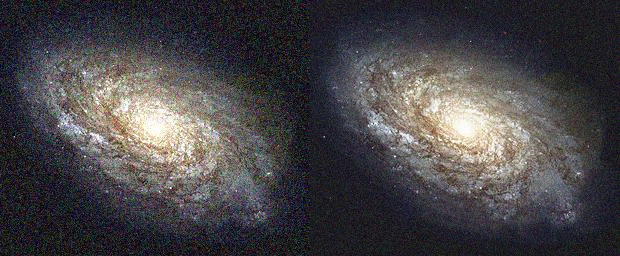

In [27]:
# Tugas 3
from math import log10, sqrt
original = cv.imread('/content/drive/MyDrive/PCVK/gambar/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/gambar/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 28.875536052555887 (dB)


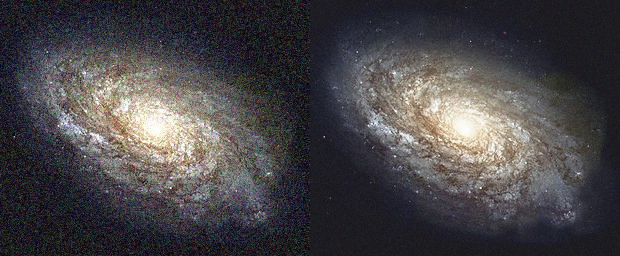

In [28]:
dst = cv_img[0]
noise_number = 29 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 28.871257632359892 (dB)


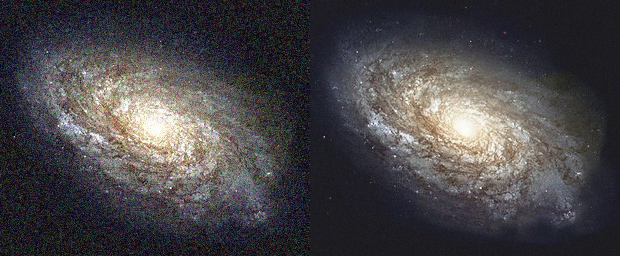

In [29]:
dst = cv_img[0]
noise_number = 59 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 28.873309527397094 (dB)


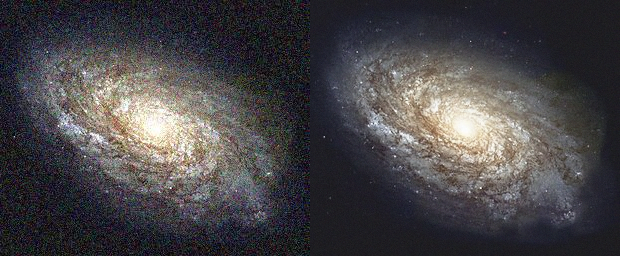

In [30]:
dst = cv_img[0]
noise_number = 79 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 28.87123037548994 (dB)


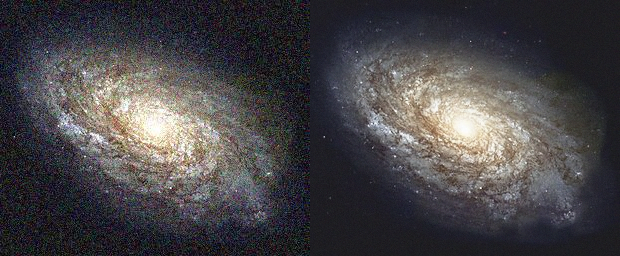

In [31]:
dst = cv_img[0]
noise_number = 99 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

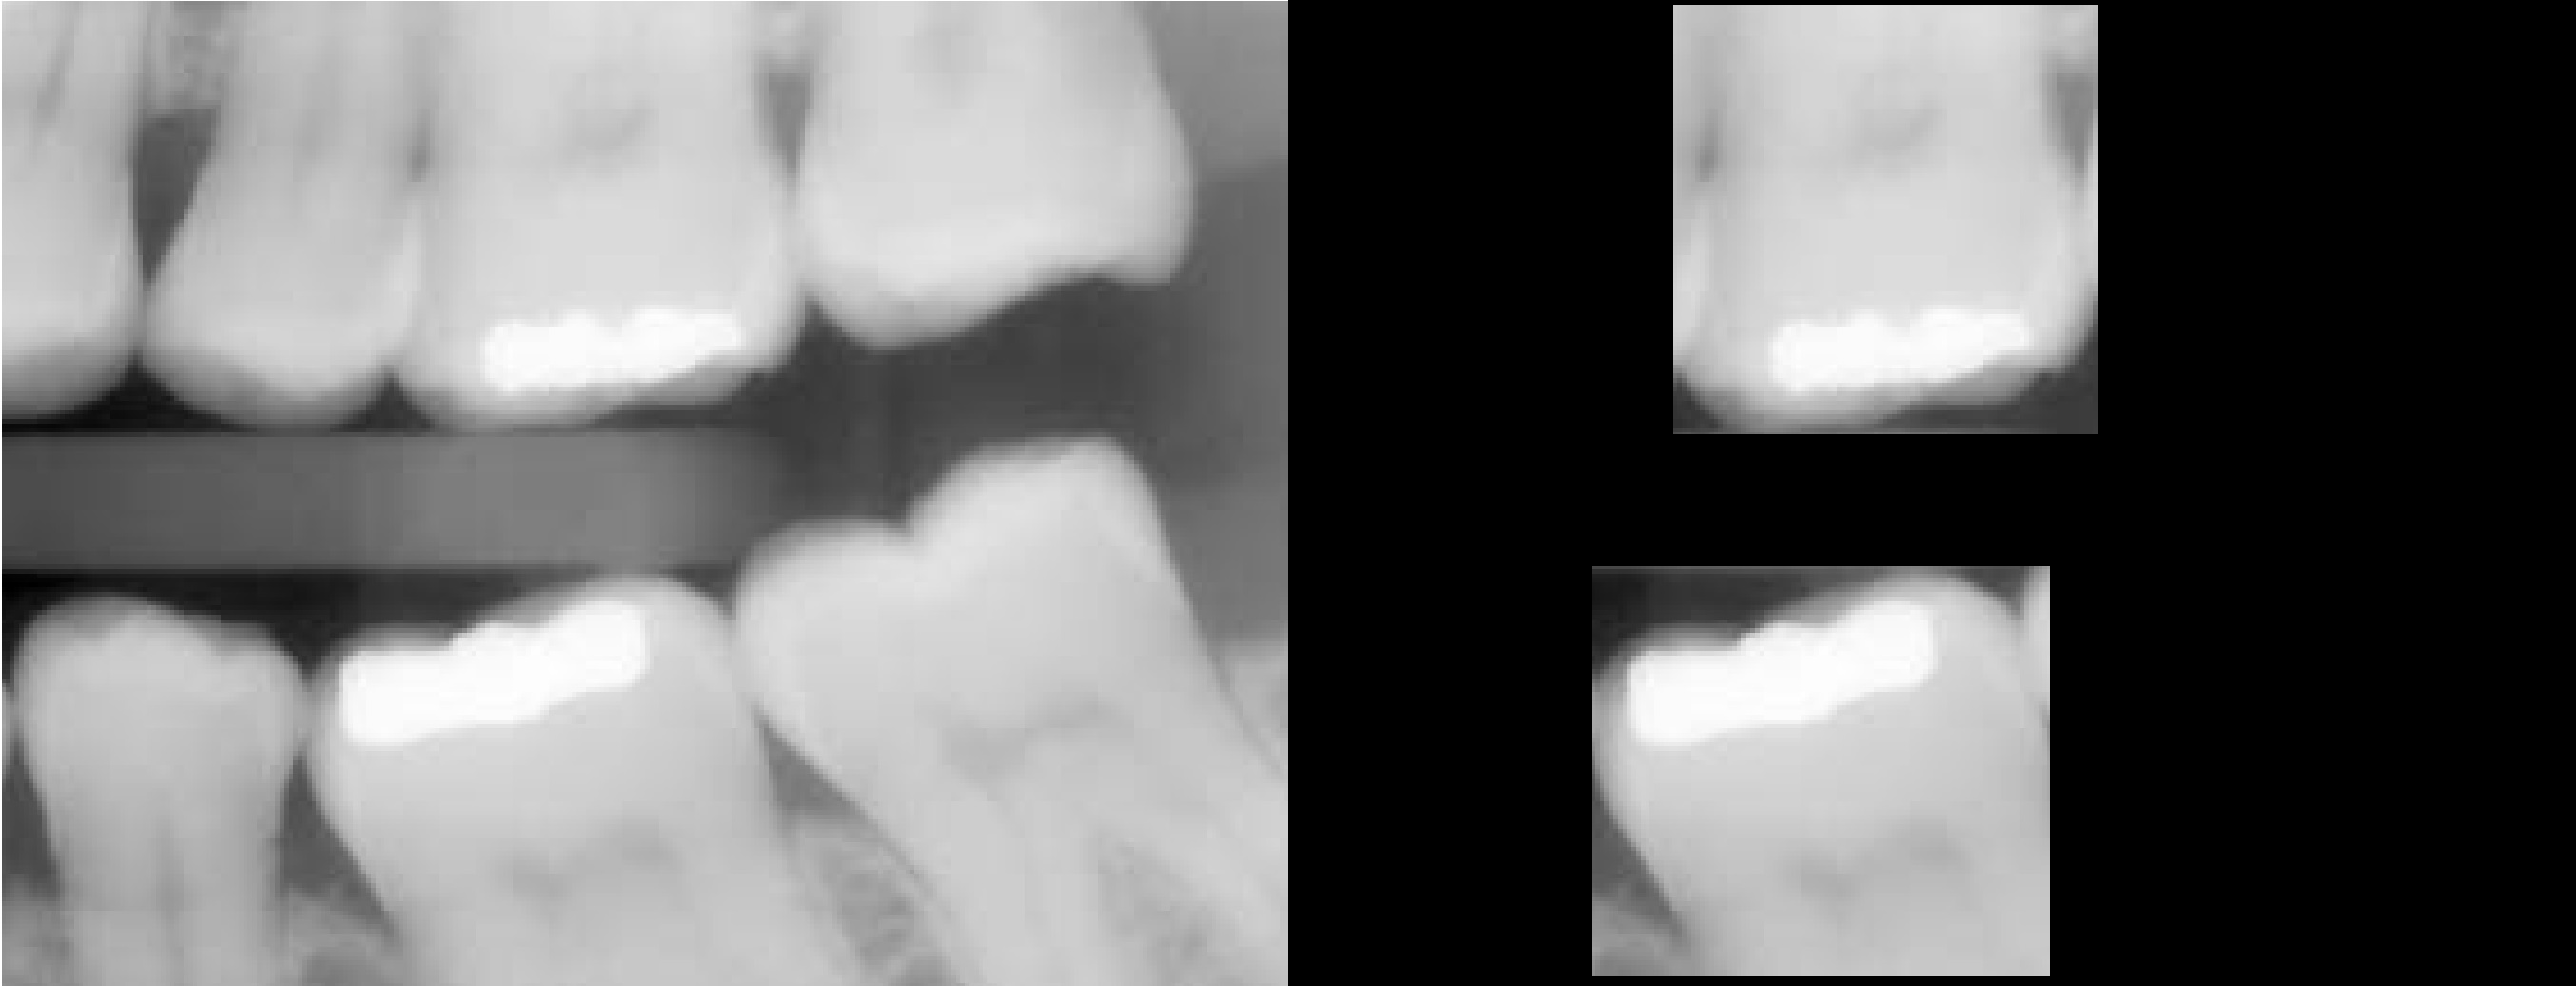

In [33]:
# Tugas 4
img = cv.imread('/content/drive/MyDrive/PCVK/gambar/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result1 = img & mask1

final_frame = cv.hconcat((img, result1))
cv2_imshow(final_frame)

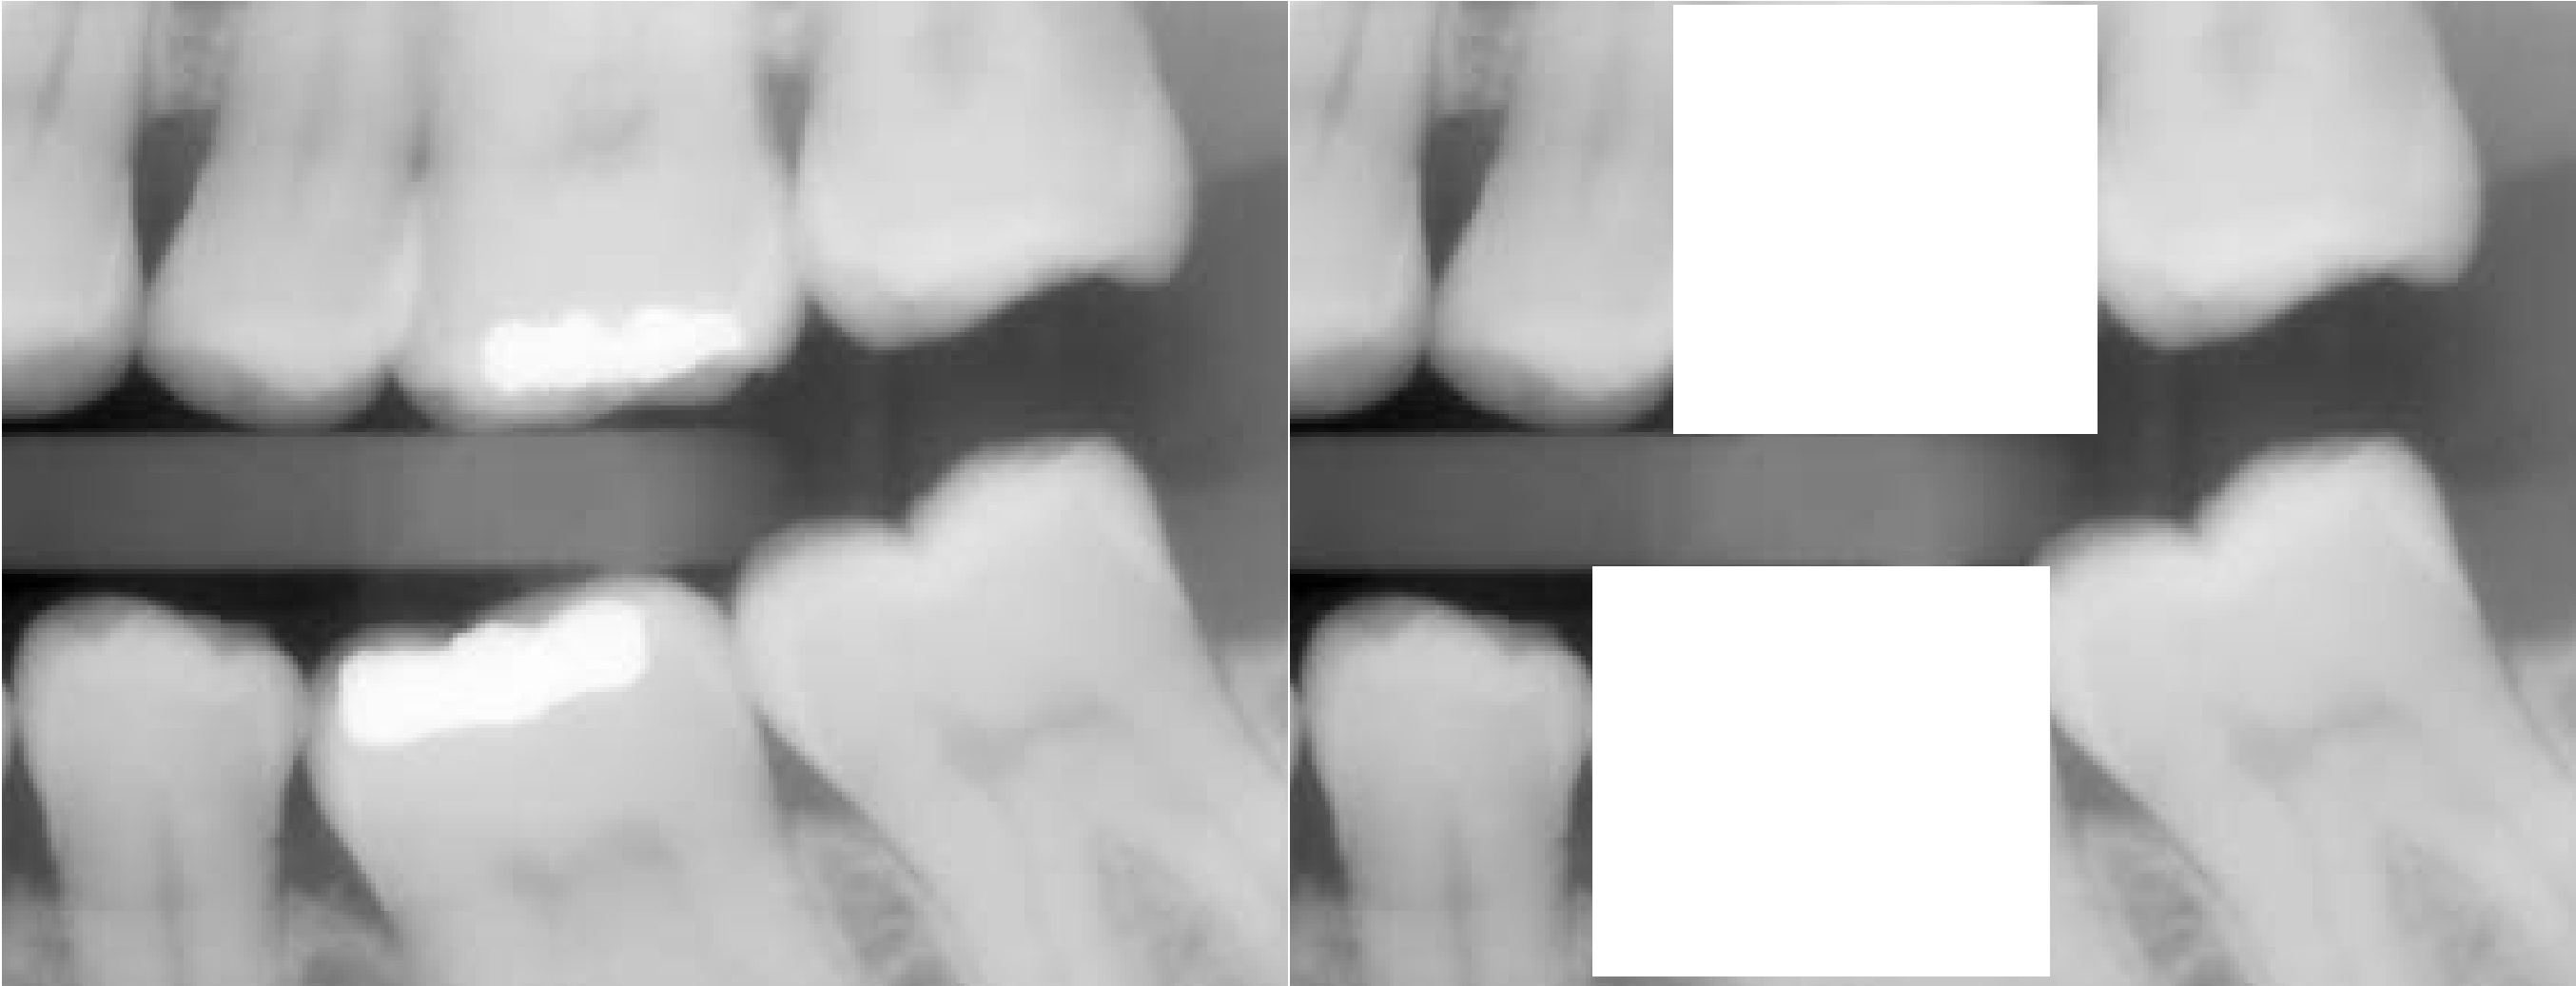

In [34]:
img = cv.imread('/content/drive/MyDrive/PCVK/gambar/teeth.jpg')
mask_or = np.zeros(img.shape, dtype=np.uint8)
mask_or = cv.rectangle(mask_or,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img | mask_or

mask_or1 = cv.rectangle(mask_or,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_or1 = img | mask_or1

final_frame = cv.hconcat((img, result_or1))
cv2_imshow(final_frame)

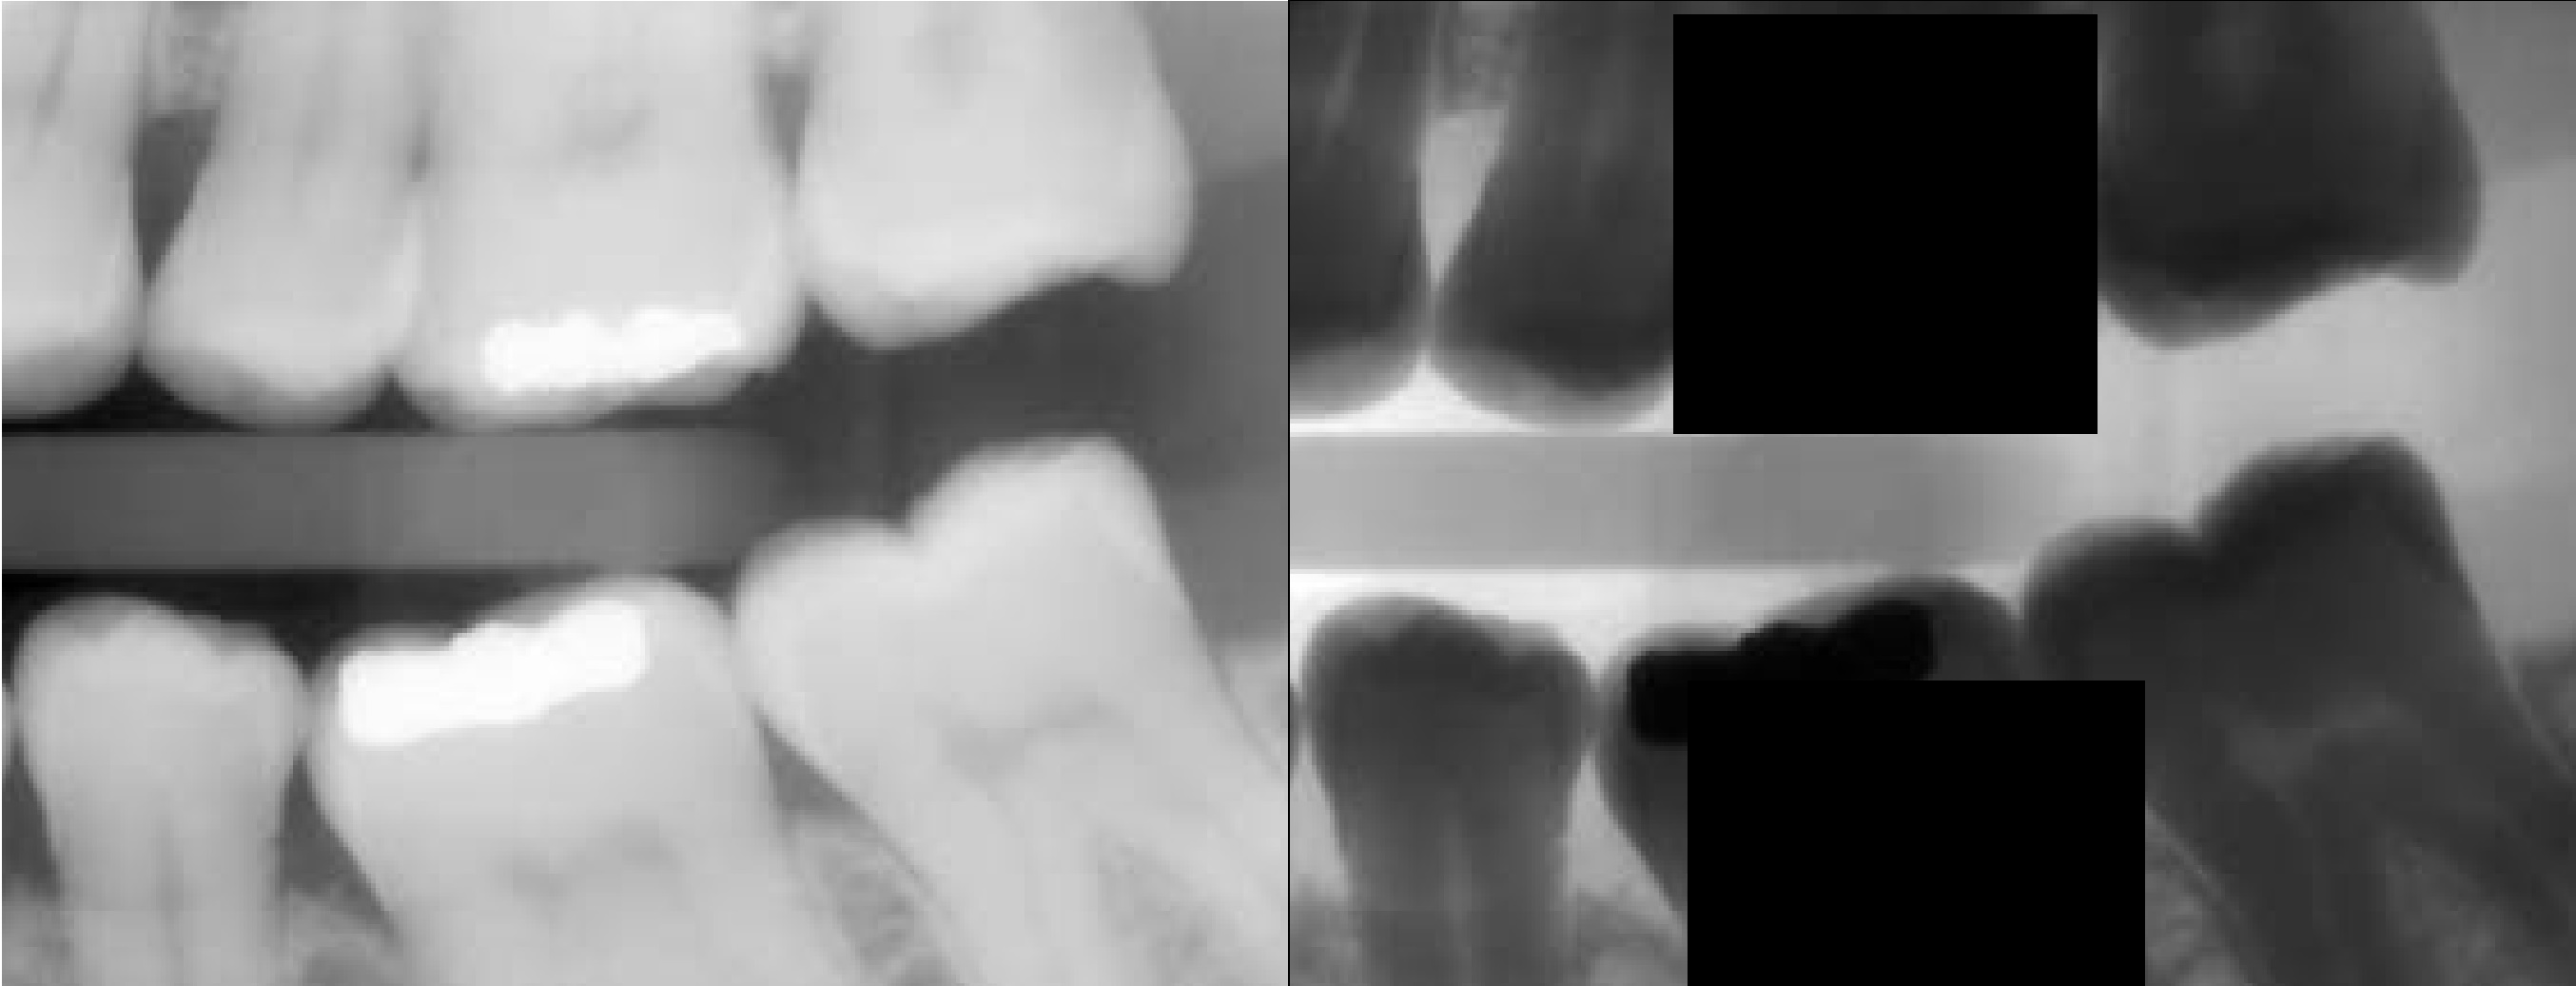

In [43]:
img = cv.imread('/content/drive/MyDrive/PCVK/gambar/teeth.jpg')
mask_not = np.zeros(img.shape, dtype=np.uint8)
mask_not = cv.rectangle(mask_not,pt1=(420,715),pt2=(900,1115),color=(255,255,255),thickness=-1)

result = ~img & ~mask_not

mask_not1 = cv.rectangle(mask_not,pt1=(405,15),pt2=(850,455),color=(255,255,255),thickness=-1)

result_not1 = ~img & ~mask_not1

final_frame = cv.hconcat((img, result_not1))
cv2_imshow(final_frame)

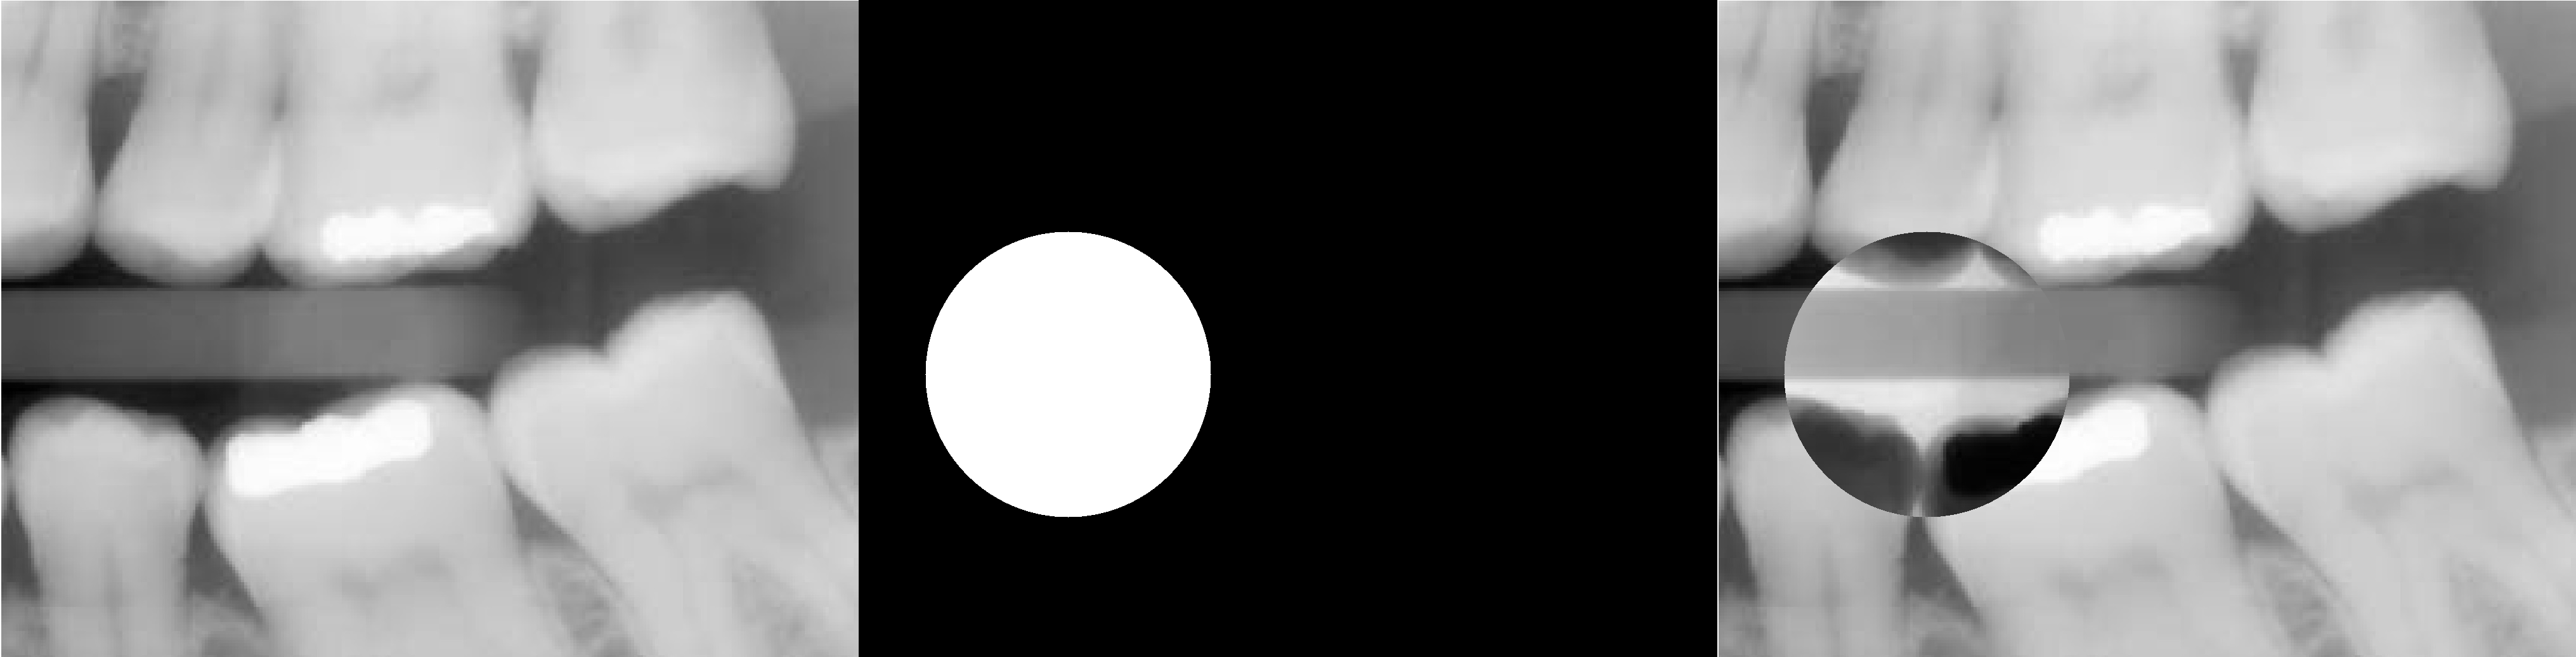

In [39]:
img = cv.imread('/content/drive/MyDrive/PCVK/gambar/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (330, 590), 225, (255,255,255), -1)

result = img ^ mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

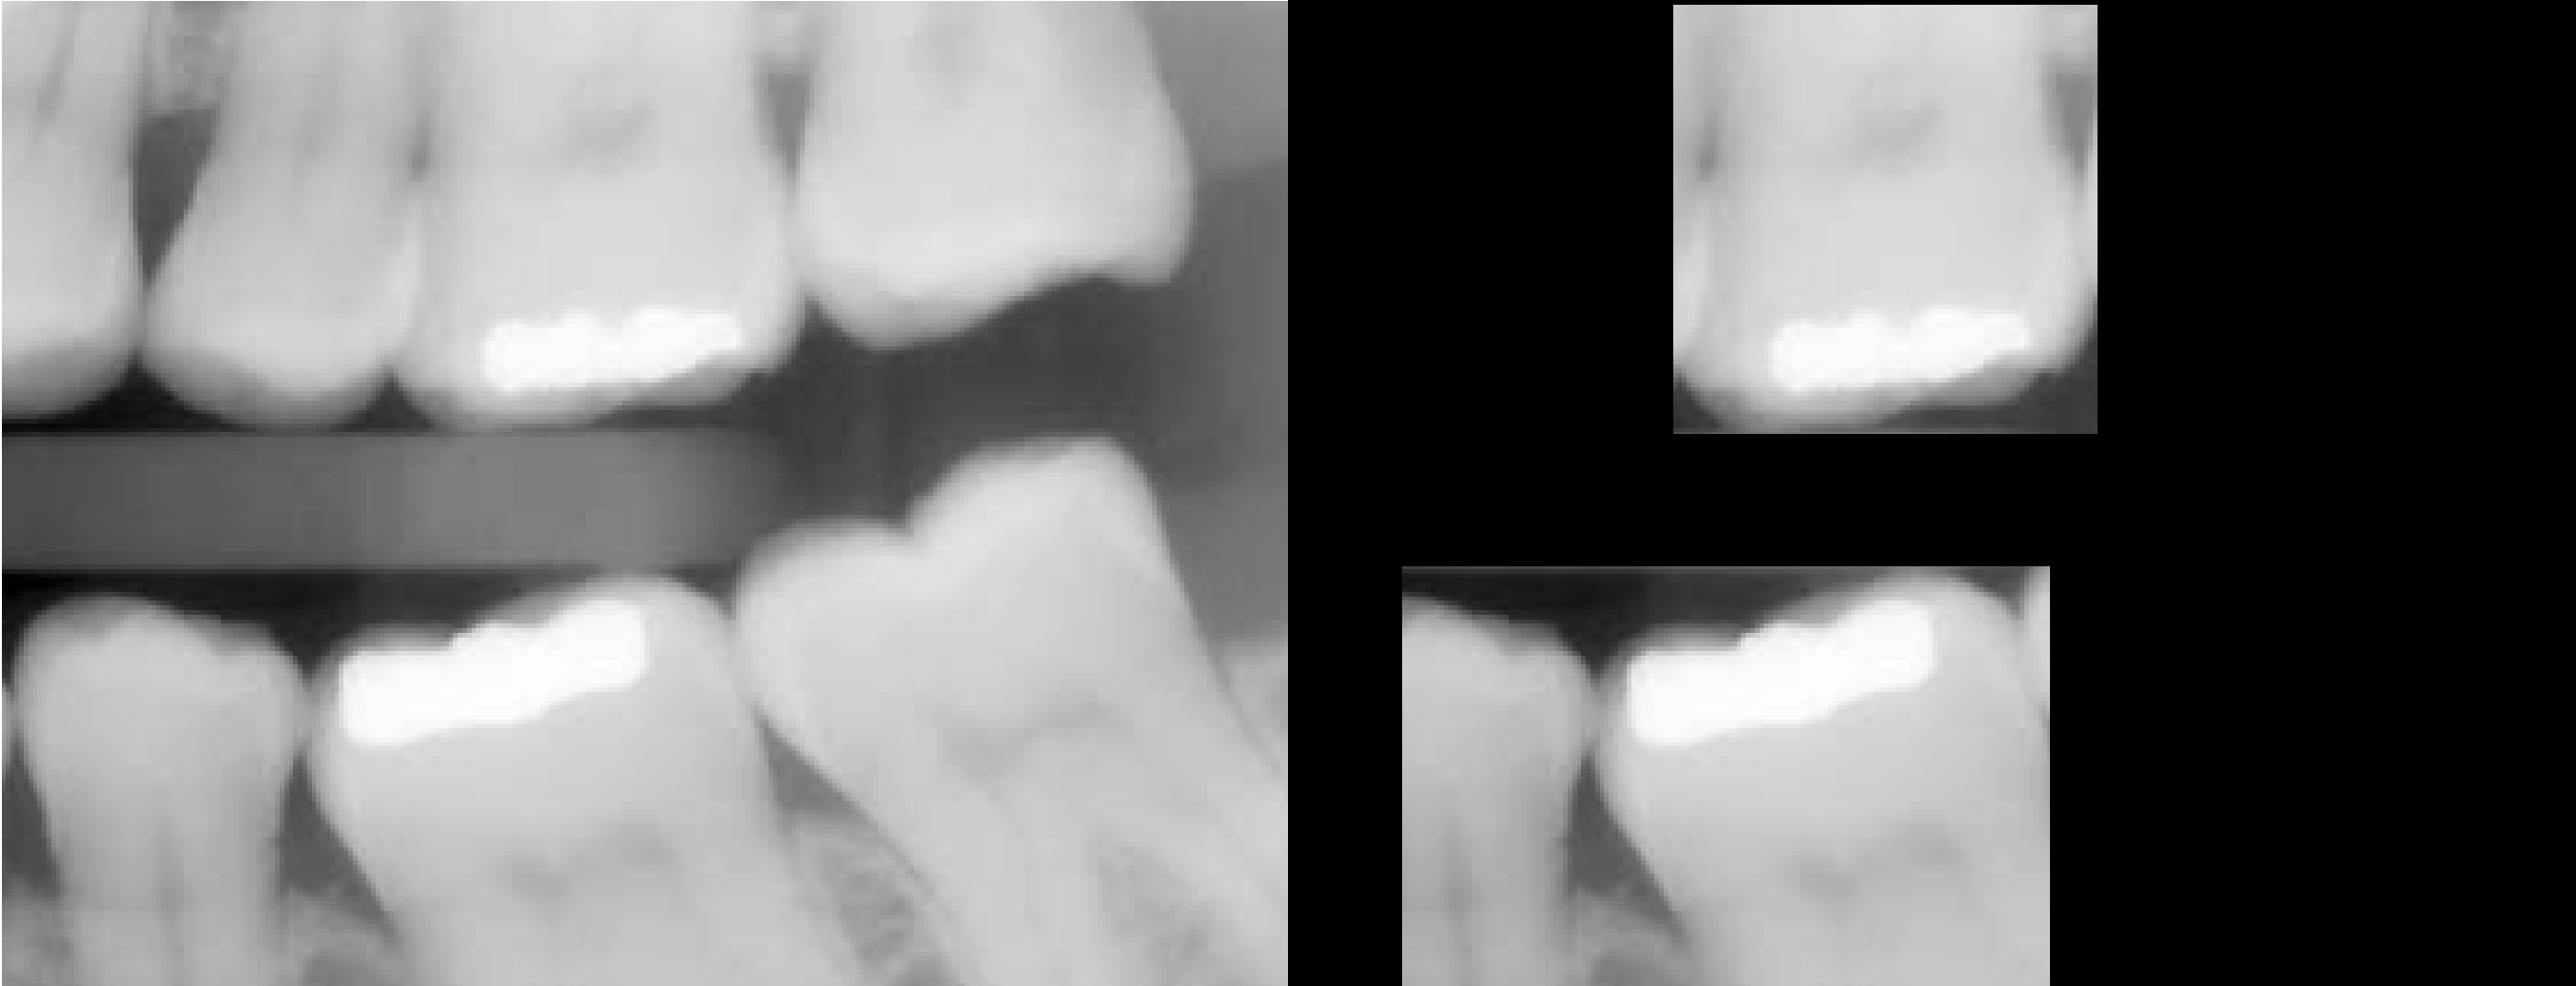

In [54]:
img = cv.imread('/content/drive/MyDrive/PCVK/gambar/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(120,595),pt2=(800,1525),color=(255,255,255),thickness=-1)

result = img & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result1 = img & mask1

final_frame = cv.hconcat((img, result1))
cv2_imshow(final_frame)